# Telstra Network Disruptions

<br> Hecho por: Zurisadai Velázquez Manzanero <br>
<br>Fecha de inicio: Domingo 5/01/2020<br>
<br>Fecha de entrega: Domingo 12/01/2020<br>
<br> Visualización desde Github : https://github.com/Zurishadday/pr_kaggle/blob/master/Proyecto.ipynb <br>

## 1. Business Understanding

Telstra es una empresa de telecomunicaciones más grande de Australia

Objetivo: Telstra desea predecir la gravedad de las interrupciones en su red con un conjunto de datos (propocionados en kaggle). Su fin último es mejorar la experiencia del cliente prediciendo con anticipación las futuras interrupciones en ubicaciones específicas.

## 2. Data understanding

**Archivos**
- train.csv - el conjunto de entrenamiento para la severidad de la falla
- test.csv - el conjunto de prueba para la severidad de la falla
- sample_submission.csv – una muestra del formato correcto para la entrada
- event_type.csv: tipo de evento relacionado con el conjunto de datos principal
- log_feature.csv - características extraídas de los archivos de registro
- resource_type.csv: tipo de recurso relacionado con el conjunto de datos principal
- severity_type.csv: tipo de severidad de un mensaje de advertencia que proviene del registro


- **fault_severity** (target) = La gravedad de la falla  y tiene 3 categorías: 0,1,2 (0 significa sin falla, 1 significa solo unas pocas y 2 significa muchas). 

In [3]:
import numpy as np 
import pandas as pd

In [13]:
dfevent = pd.read_csv(r"~\Downloads\telstra_recruiting_network\event_type.csv")
dflog = pd.read_csv(r"~\Downloads\telstra_recruiting_network\log_feature.csv")
dfresource = pd.read_csv(r"~\Downloads\telstra_recruiting_network\resource_type.csv")
dfsubmission = pd.read_csv(r"~\Downloads\telstra_recruiting_network\sample_submission.csv")
dfseverity = pd.read_csv(r"~\Downloads\telstra_recruiting_network\severity_type.csv")
dftest = pd.read_csv(r"~\Downloads\telstra_recruiting_network\test.csv")
dftrain = pd.read_csv(r"~\Downloads\telstra_recruiting_network\train.csv")

### Descriptivo del archivo  "event_type.csv"

De los event_types existentes, 8015 clientes tienen un solo event_type, 8873 tienen dos event_type y así sucesivamente hasta que un cliente tiene 11 event_type diferentes.

In [15]:
dg = dfevent.groupby('id').aggregate('count').reset_index()
dg.groupby('event_type').aggregate('count').head()

,id
event_type,
1,8015
2,8873
3,1375
4,222
5,34


Lo que se hará a continuación es ver que event_types son más relevantes dado su repetición. Hay que recordar que existen en la base de dfevent: 31170 registros. Y nosotros por simplicidad y relevancia estadística se tomarán los event_type que más se repiten por el dilema de Pareto. 
- event_type: 11,35,34,15 y 20. Los anteriores event_type conforman alrededor del 84% de los datos. Por relevancia solo incluiremos esos únicamente.

In [17]:
dfevent.groupby('event_type').aggregate('count').sort_values(by=['id'],ascending=False).head()

,id
event_type,
event_type 11,7888
event_type 35,6615
event_type 34,5927
event_type 15,4395
event_type 20,1458


### Descriptivo del archivo "resource_type.csv"

De igual forma se observan que los Clientes llegan a tener al mismo tiempo 5 diferentes resource_type

In [18]:
dg = dfresource.groupby('id').aggregate('count').reset_index()
dg.groupby('resource_type').aggregate('count')

,id
resource_type,
1,16421
2,1814
3,257
4,44
5,16


Por relevancia incluiremos el resource_type 8 y 2 que conforman el 91% de los datos.

In [19]:
dfresource.groupby('resource_type').aggregate('count').sort_values(by=['id'],ascending=False)

,id
resource_type,
resource_type 8,10268
resource_type 2,8918
resource_type 6,582
resource_type 7,498
resource_type 4,330


### Descriptivo del archivo "log_feature.csv"

El caso de este archivo es especial. El siguiente código muestra que cada 'feature #' tienen diferentes volúmenes. Se podrían agrupar sacando la media, pero en este caso no es posible hacerlo, ya que los volúmenes son características del feature que lo vuelven único.  

In [22]:
dflog.groupby(['log_feature', 'volume']).size()

log_feature  volume
feature 1    1         20
             2          1
feature 10   1         11
             2          2
             3          5
                       ..
feature 98   1          3
             2          3
             3          1
             5          1
feature 99   1          3
Length: 3972, dtype: int64

La mejor forma de proceder es extraer los principales features y luego también extraer los principales volúmenes por feature.

La siguiente línea de código muestra que los principales feature son los siguientes:'feature 312','feature 232','feature 82','feature 203','feature 313','feature 233','feature 307','feature 54','feature 170','feature 71','feature 315','feature 134','feature 80','feature 235','feature 193','feature 219','feature 68'

Y del volumen son:  1 al 7

In [23]:
dflog.log_feature.value_counts().head()

feature 312    5267
feature 232    4754
feature 82     3472
feature 203    2823
feature 313    2145
Name: log_feature, dtype: int64

In [24]:
dflog.volume.value_counts().head()

1    20713
2     9716
3     4488
4     3713
5     2207
Name: volume, dtype: int64

### Descriptivo del archivo "severity_type.csv"

Por último, severity se toman todos los campos.

In [25]:
dfseverity.severity_type.value_counts().head()

severity_type 2    8737
severity_type 1    8728
severity_type 4    1014
severity_type 5      65
severity_type 3       8
Name: severity_type, dtype: int64

## 3. Data Preparation

Una vez entendido los datos, se toman las principales variables por relevancia y se meten en la función "get_dummies"

In [26]:
dfseverity=pd.get_dummies(dfseverity,prefix_sep='')
dfseverity=dfseverity.groupby(['id']).aggregate('sum').reset_index()
dfseverity.head()

,id,severity_typeseverity_type 1,severity_typeseverity_type 2,severity_typeseverity_type 3,severity_typeseverity_type 4,severity_typeseverity_type 5
0,1,1,0,0,0,0
1,2,0,1,0,0,0
2,3,1,0,0,0,0
3,4,0,0,0,1,0
4,5,0,1,0,0,0


In [66]:
principal=['resource_type 8','resource_type 2']
dfresource=dfresource.loc[dfresource.resource_type.isin(principal),:]
dfresource=pd.get_dummies(dfresource,prefix_sep='')
dfresource=dfresource.groupby(['id']).aggregate('sum').reset_index()
dfresource.head()

,id,resource_typeresource_type 2,resource_typeresource_type 8
0,1,0,1
1,2,1,0
2,3,0,1
3,4,1,0
4,5,1,0


In [29]:
principal=['event_type 11','event_type 35','event_type 34','event_type 15','event_type 20']
dfevent=dfevent.loc[dfevent.event_type.isin(principal),:]
dfevent=pd.get_dummies(dfevent,prefix_sep='')
dfevent=dfevent.groupby(['id']).aggregate('sum').reset_index()
dfevent.head()

,id,event_typeevent_type 11,event_typeevent_type 15,event_typeevent_type 20,event_typeevent_type 34,event_typeevent_type 35
0,1,1,0,0,0,0
1,2,0,0,0,1,1
2,3,1,0,0,0,0
3,5,0,0,0,1,1
4,6,0,0,0,1,0


In [30]:
principal=['feature 312','feature 232','feature 82','feature 203','feature 313','feature 233','feature 307','feature 54'
          ,'feature 170','feature 71','feature 315','feature 134','feature 80','feature 235','feature 193','feature 219','feature 68']
dflog=dflog.loc[dflog.log_feature.isin(principal),:]
dflog=dflog.loc[dflog.volume<7,:]
dflog.set_index(['id'],inplace=True)
dflogX=pd.get_dummies(
                    pd.DataFrame(
                            dflog[['log_feature', 'volume']].apply(lambda x: '_'.join(x.astype(str)), axis=1)
                    ,columns=[''],index=dflog.index)
            ,prefix_sep='').reset_index()
dflogX=dflogX.groupby(['id']).aggregate('sum').reset_index()

### Joins de los archivos con el archivo "train.csv" que contiene la variable objetivo.

El siguiente código muestra una forma reducida de realizar el join y posteriormente rellenar los missing values por ceros.

In [32]:
from functools import reduce

In [67]:
df = [dftrain,dfevent, dflogX, dfresource,dfseverity]
lf = reduce(lambda left, right: pd.merge(left,right,on='id',how='left'), df)
lf.fillna(0,inplace=True)

También se realizó el anterior código con python desde Dataiku y su respectivo Join.

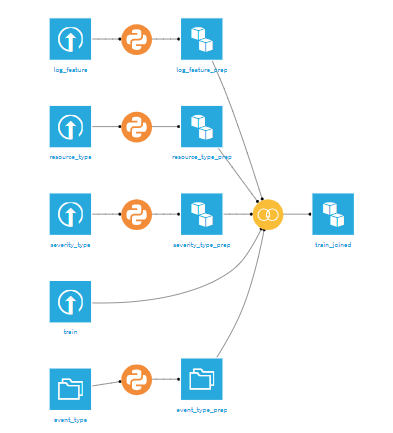

## 4. Modeling

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import confusion_matrixx
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

In [69]:
#X = t.drop(columns=['fault_severity'])
#y = t['fault_severity']

X = lf.drop(columns=['fault_severity','id','location'])
y = lf['fault_severity']

# tomo una muestra estratificada del 20%

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [70]:
X_train = pd.DataFrame(X_train,columns=list(X.columns))
X_test  = pd.DataFrame(X_test,columns=list(X.columns))

Exploramos el número de muestras que tenemos por cada categoría de la variable objetivo:

In [71]:
lf.groupby('fault_severity').count()[['id']]

,id
fault_severity,
0,4784
1,1871
2,726


Desde Dataiku

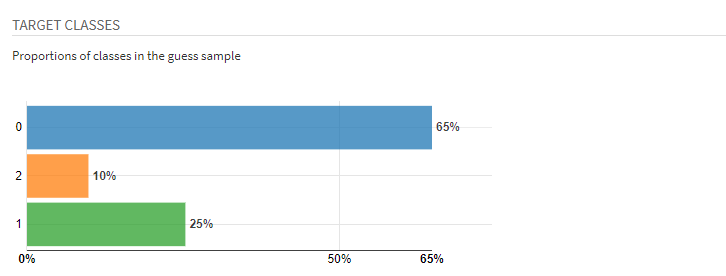

Vemos que para balancear el dataset podemos darle un peso a cada categoría de manera que queden parejas:
    
faul_severity '0': 4784/4784= 1 <br>
faul_severity '1':4781/1871 = 2.55 <br>
faul_severity '2':4781/726 = 6.58 <br>


C0 = 1 <br>
C1 = 2.55 <br>
C2 = 6.58 <br>

Seteamos los parámetros para varios modelos: <br>
en el caso de class_weight pondremos los coeficientes que encontramos y unos mas conservadores en el peso de clase

Parámetros de la Logit:
- solver : Algortimo utilizado para minimizar la loss-function
- 'multi_class': se elige 'multinomial' por ser un problema con target multicategórico
- class_weight: Se dan los pesos que se les quiere otorgar a las clases [{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]

Parámetros del XGBoost:
- 'objective': se elige 'multi:softmax' por ser un problema multicategórico
- 'max_depth': máximo número de descendencias de los árboles
- 'eval_metric': métrica de evaluación, log-loss multicategórica
- 'C': Parámetro de regularización para outliers
- Class weigth: seteado igual que antes

Parámetros del SVC:
- 'Gamma': Parámetro de influencia radial de los puntos 
- 'C': Parámetro de regularización.

Parámetros del RF:
- 'n_estimators' : número de arboles
- 'criterio' : criterio de corte
- max features: máximo número de variables por árbol
- max depth: máximo número de descendencias para prevenir overfitting


In [72]:
paramsLogit   = {'solver':['newton-cg', 'lbfgs','sag', 'saga'],'multi_class':['multinomial'],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}
paramsXGBoost = {'objective':['multi:softmax'],'max_depth':[4,5,6,7],'eval_metric' : ['mlogloss'],'C':[0.1,.5,1,5],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}
paramsRF      = {'n_estimators':[60,80,100,120],'criterion':['gini','entropy'],'max_features':['sqrt','log2'],'max_depth':[5,6,7],'class_weight':[{0: 1, 1: 2.55,2:6.58},{0: 1, 1: 1.5,2:3.5}]}

- log_loss: cuanto menor sea la puntuación, mejor será el modelo.

- neg_log_loss:la puntuación es negativa: cuanto mayor sea la puntuación, mejor será el modelo.

 -cv: Quiere decir Cross-Validation.

In [73]:
Logit   = LogisticRegression()
XGBoost = XGBClassifier()
RFC     = RandomForestClassifier()

GS_Logit   = GridSearchCV(Logit,   n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsLogit,verbose=3)
GS_XGBoost = GridSearchCV(XGBoost, n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsXGBoost,verbose=3)
GS_RFC     = GridSearchCV(RFC,     n_jobs=-1, cv=5,  scoring='neg_log_loss', param_grid=paramsRF,verbose=3)

Se realiza una Estandarización.

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [75]:
GS_Logit.fit(X_train_s,y_train)
GS_XGBoost.fit(X_train,y_train)
GS_RFC.fit(X_train,y_train)

Best_Logit = GS_Logit.best_estimator_
Best_XGBoost = GS_XGBoost.best_estimator_
Best_RFC = GS_RFC.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.1s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.9min finished


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   28.7s finished


In [76]:
Best_Logit.fit(X_train_s,y_train)
Best_XGBoost.fit(X_train,y_train)
Best_RFC.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5, 2: 3.5},
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Se realiza la predicción del mejor modelo encontrado de acuerdo al parametro de neg_log_loss

In [77]:
y_pred_Logit = Best_Logit.predict(X_test_s)
y_pred_XGBoost = Best_XGBoost.predict(X_test)
y_pred_RFC = Best_RFC.predict(X_test)

In [78]:
y_prob_Logit = Best_Logit.predict_proba(X_test_s)
y_prob_XGBoost = Best_XGBoost.predict_proba(X_test)
y_prob_RFC = Best_RFC.predict_proba(X_test)

## 5. Evaluation

Se obtiene que el mejor modelo es  **XGBoost con un 0.69465 de accuricy y un 0.666 de Log loss.**

In [79]:
accur_Logit = accuracy_score(y_test,y_pred_Logit)
accur_XGBoost = accuracy_score(y_test,y_pred_XGBoost)
accur_RFC = accuracy_score(y_test,y_pred_RFC)

dic_accur = {'Logit':accur_Logit,'XGBoost':accur_XGBoost,'RFC':accur_RFC}

print(dic_accur)

{'Logit': 0.6452268111035884, 'XGBoost': 0.6946513202437373, 'RFC': 0.6479350033852403}


In [80]:
#log los XGBoost
log_loss(y_test,y_prob_XGBoost)

0.6665892149577107

Por parte de la herramienta Dataiku, se obtuvo los siguientes resultados con los parametros por Default.

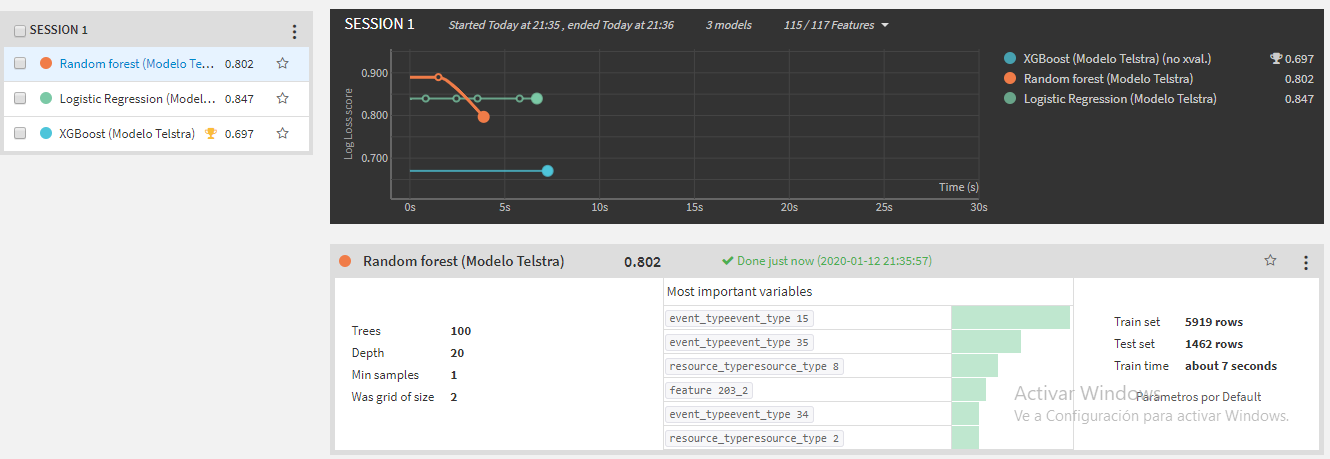

## 6. Evaluation

In [83]:
confusion_matrix(y_test,y_pred_Logit)

array([[729,  96, 132],
       [193, 127,  55],
       [ 37,  11,  97]], dtype=int64)

In [84]:
confusion_matrix(y_test,y_pred_XGBoost)

array([[898,  43,  16],
       [258, 103,  14],
       [107,  13,  25]], dtype=int64)

In [85]:
confusion_matrix(y_test,y_pred_RFC)

array([[760,  51, 146],
       [213,  95,  67],
       [ 37,   6, 102]], dtype=int64)

- Conclusiones:
<br> Existen veces que de acuerdo a la función de mejor desempeño (en este caso log loss) no es el único KPI a considerar para poner en productivo un modelo. Es importante también evaluar cual modelo se generaría menos perdida monetaria o de insatisfacción por parte de la unidad de negocio como en este caso el cliente que es Telstra. Por lo que existen otros indicares también podrían ser la estabilidad del modelo a través del tiempo o la interpretabilidad. <br>

<br>También una cosa a resaltar cual de los modelos prefieres dado la menor cantidad de Falsos Positivos o Falsos Negativos según el modelo. Normalmente se defino eso con la unidad de Negocio.<br>
